In [9]:
# Owen Zeng
# Felix Chen
# GitHub Repo: https://github.com/usc-ee250-fall2023/lab09-ml-lab09-owen-felix.git
# We made changes to predict.py as well because our model has the output of 0 or 1 instead of 1 or 2
# The change is approved by the Instructor
import pickle

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns

from sklearn.model_selection import train_test_split

In [10]:
coins = pd.read_csv("coins.csv")
coins.head(10)
#print(coins)

,reflectance,weight,denomination
0,24.226059,4.384837,1
1,24.322672,5.014980,1
2,23.527142,4.569030,1
3,26.765469,6.320783,1
4,22.457390,4.954992,1
5,22.912666,5.286136,1
6,23.095557,4.432129,1
7,26.447107,5.660208,1
8,25.152615,5.256971,1
9,25.137096,4.227505,1


<Axes: xlabel='reflectance', ylabel='weight'>

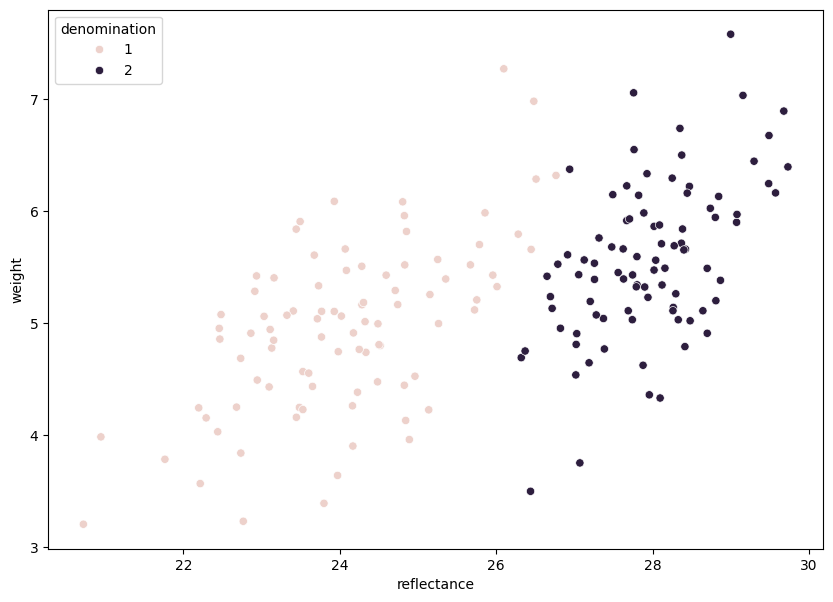

In [11]:
sns.scatterplot(x="reflectance",y="weight",data=coins, hue="denomination")

In [12]:
# test train split
X = coins[["reflectance","weight"]].to_numpy()
#y = coins[["denomination"]].to_numpy()
y = coins["denomination"].apply(lambda x: 0 if x == 1 else 1).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
## Import your favourite classifier and train it using the X_train data and hte y_train labels
import os
# this line disables the use of GPU when training
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## make sure you instantiate your classifier and name it clf

## for example, if you are using perceptron, you would do the following - 

# -> from sklearn.linear_model import Perceptron
# -> clf = Perceptron(tol=1e-3, random_state=0)
# .... call fit , etc.

clf = Sequential()
# 1st hidden layer
# add a hidden layer with 128 neurons
# the input shape is 2 because we have 2 features reflectance and weight
# the activation function is relu
# the output shape is 128
clf.add(Dense(128, input_shape=(2,), activation='relu')) 

# 2nd hidden layer
# add a hidden layer with 64 neurons
# the activation function is relu
# the output shape is 64 

clf.add(Dense(64, activation='relu'))

# 3rd hidden layer
# add a hidden layer with 32 neurons
# the activation function is relu
# the output shape is 32
clf.add(Dense(32, activation='relu'))  # Additional hidden layer


# output layer
# the activation function is sigmoid
# the output shape is 1 because we are classifying 2 classes to either 1 or 2
clf.add(Dense(1, activation='sigmoid'))

# compile the model
# the loss function is binary cross entropy
# the optimizer is adam with learning rate 0.001, which means the weights are updated using adam
# the metrics is accuracy, which means we are measuring the accuracy of the model
clf.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


# fit the model
# the batch size is 32
# the number of epochs is 200
clf.fit(X_train, y_train, batch_size=32, epochs=200)

# After training your model:
predictions = clf.predict(X_test)  # This will give you probabilities
predictions = (predictions > 0.5).astype(int)  # This will give you class labels 0 or 1
predictions = predictions + 1  # This will change class labels to 1 or 2

Epoch 1/200
5/5 [==============================] - 1s 11ms/step - loss: 0.7530 - accuracy: 0.5455
Epoch 2/200
5/5 [==============================] - 0s 17ms/step - loss: 0.7271 - accuracy: 0.4615
Epoch 3/200
5/5 [==============================] - 0s 15ms/step - loss: 0.6910 - accuracy: 0.5734
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6953 - accuracy: 0.4965
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.4965
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6935 - accuracy: 0.4965
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5035
Epoch 8/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6901 - accuracy: 0.4965
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 0.6859 - accuracy: 0.5385
Epoch 10/200
5/5 [==============================] - 0s 11ms/step - loss: 0.6888 - accuracy: 0.4965
Epoch 11/200
5/5 [======

In [14]:
## test the accuracy of your model

# evaluate the model
# the test data is X_test
# the test labels is y_test
_, accuracy = clf.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 15ms/step - loss: 0.2035 - accuracy: 0.9444
Accuracy: 94.44


222/222 [==============================] - 1s 3ms/step


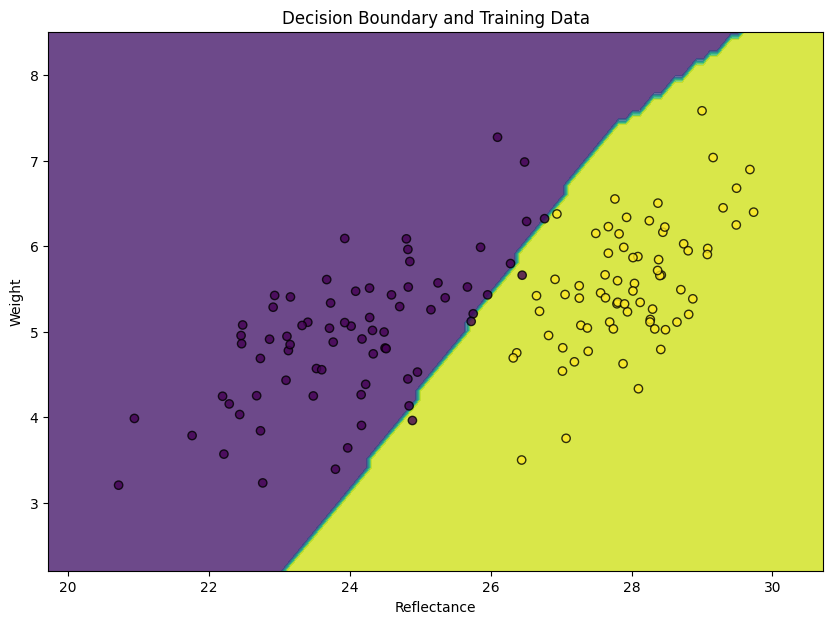

In [15]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
## hint: look at the ann example

# Plot the decision boundary of your classifier along with the scatterplot of the training data.

# Set the min and max values for the x-axis (Reflectance) with some padding (-1 and +1)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
# Set the min and max values for the y-axis (Weight) with some padding (-1 and +1)
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Create a mesh grid that spans the entire plot area with a step size of 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Use the classifier to predict the label for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert the predicted probabilities to class labels (0 or 1)
Z = (Z > 0.5).astype(int)

# Reshape the predictions to match the shape of the mesh grid
Z = Z.reshape(xx.shape)

# Plot the decision boundary by filling areas of the mesh grid based on class predictions
plt.contourf(xx, yy, Z, alpha=0.8)

# Overlay a scatter plot of the training data. Colors represent actual class labels.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', linewidth=1, alpha=0.8)

# Label the x-axis as 'Reflectance'
plt.xlabel('Reflectance')

# Label the y-axis as 'Weight'
plt.ylabel('Weight')

# Set the title of the plot
plt.title('Decision Boundary and Training Data')

# Display the plot
plt.show()

In [16]:
## additional stuff you want to add 

In [17]:
# dump your classifier into a pickle file
pickle.dump(clf, open("model.pickle","wb"))